<a href="https://colab.research.google.com/github/ffirst2551/BankGuard-AI/blob/main/BankGuard_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ---------------------------------------------
# 🏦 BankGuard AI - Data Cleaning & Feature Selection
# ---------------------------------------------

#1. Import Libraries
import pandas as pd
import numpy as np

#2. โหลดข้อมูล
df = pd.read_csv("/content/Customer-Churn-Records.csv")
print("✅ ขนาดข้อมูล:", df.shape)
df.head()


✅ ขนาดข้อมูล: (10000, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
#3. ตรวจสอบค่าว่าง
print("🧹 Missing values per column:")
print(df.isnull().sum())

# ดูสรุปข้อมูลเบื้องต้น
df.info()


🧹 Missing values per column:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 1

In [ ]:
#4. ตรวจสอบค่าผิดปกติ (Outliers)
print("ค่าอายุ (Age):", df['Age'].min(), "–", df['Age'].max())
print("คะแนนเครดิต (CreditScore):", df['CreditScore'].min(), "–", df['CreditScore'].max())
print("ยอดเงินคงเหลือ (Balance):", df['Balance'].min(), "–", df['Balance'].max())


ค่าอายุ (Age): 18 – 92
คะแนนเครดิต (CreditScore): 350 – 850
ยอดเงินคงเหลือ (Balance): 0.0 – 250898.09


In [ ]:
df = df[(df['Age'] >= 18) & (df['Age'] <= 100)]
df = df[(df['CreditScore'] >= 300) & (df['CreditScore'] <= 850)]


In [ ]:
#5. ตัดคอลัมน์ที่ไม่จำเป็น
drop_cols = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=drop_cols)
print("🗑️ ลบคอลัมน์ที่ไม่จำเป็นแล้ว:", drop_cols)


🗑️ ลบคอลัมน์ที่ไม่จำเป็นแล้ว: ['RowNumber', 'CustomerId', 'Surname']


In [ ]:
#6. ตรวจสอบข้อมูลซ้ำ (Duplicate)
print("จำนวนข้อมูลซ้ำ:", df.duplicated().sum())
df = df.drop_duplicates()


จำนวนข้อมูลซ้ำ: 0


In [ ]:
#7. สรุปข้อมูลทางสถิติ (Min, Max, Mean)
stats = df.describe().T[['min', 'max', 'mean']]
print("📊 สรุปค่าทางสถิติ:")
print(stats)


📊 สรุปค่าทางสถิติ:
                       min        max           mean
CreditScore         350.00     850.00     650.528800
Age                  18.00      92.00      38.921800
Tenure                0.00      10.00       5.012800
Balance               0.00  250898.09   76485.889288
NumOfProducts         1.00       4.00       1.530200
HasCrCard             0.00       1.00       0.705500
IsActiveMember        0.00       1.00       0.515100
EstimatedSalary      11.58  199992.48  100090.239881
Exited                0.00       1.00       0.203800
Complain              0.00       1.00       0.204400
Satisfaction Score    1.00       5.00       3.013800
Point Earned        119.00    1000.00     606.515100


In [ ]:
#8. ตรวจสอบ Target Variable
print(df['Exited'].value_counts(normalize=True))


Exited
0    0.7962
1    0.2038
Name: proportion, dtype: float64


In [ ]:
#9. ตรวจสอบผลลัพธ์สุดท้าย
print("ข้อมูลหลังทำความสะอาด:", df.shape)
df.head()


ข้อมูลหลังทำความสะอาด: (10000, 15)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Tenure'].plot(kind='hist', bins=20, title='Tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Geography').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Card Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='CreditScore', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='CreditScore', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='Age', y='Tenure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Tenure', y='Balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['CreditScore']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Geography')):
  _plot_series(series, series_name, i)
  fig.legend(title='Geography', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('CreditScore')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['CreditScore']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Card Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Card Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('CreditScore')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Geography')):
  _plot_series(series, series_name, i)
  fig.legend(title='Geography', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Card Type')):
  _plot_series(series, series_name, i)
  fig.legend(title='Card Type', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
_df_14['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['CreditScore'].plot(kind='line', figsize=(8, 4), title='CreditScore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Tenure'].plot(kind='line', figsize=(8, 4), title='Tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Card Type'].value_counts()
    for x_label, grp in _df_18.groupby('Geography')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Geography')
_ = plt.ylabel('Card Type')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Geography'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='index', y='Geography', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Card Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='index', y='Card Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Geography'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='CreditScore', y='Geography', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Card Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='CreditScore', y='Card Type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

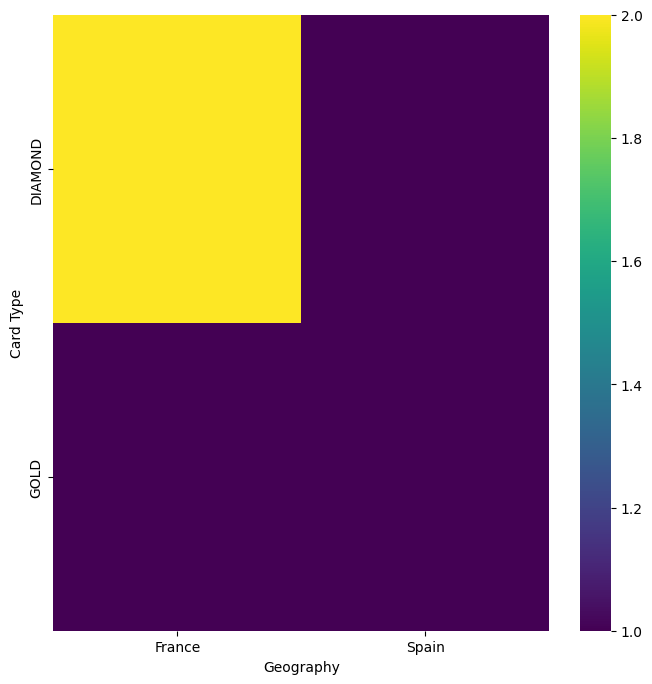

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Card Type'].value_counts()
    for x_label, grp in _df_18.groupby('Geography')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Geography')
_ = plt.ylabel('Card Type')

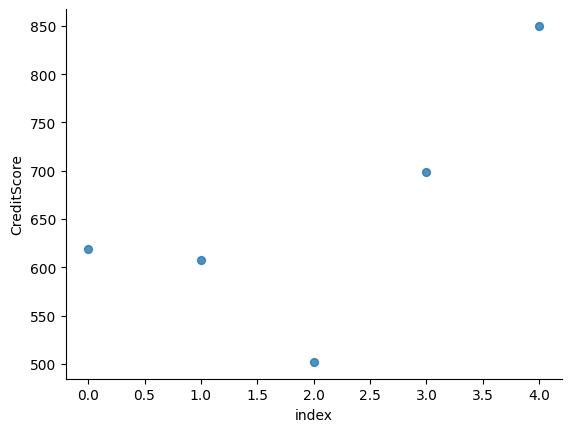

In [ ]:
from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='index', y='CreditScore', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

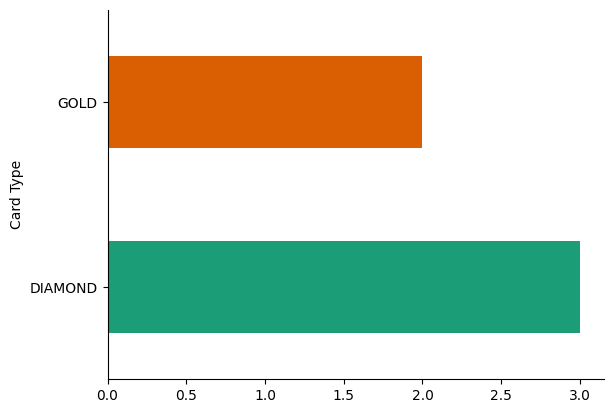

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Card Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

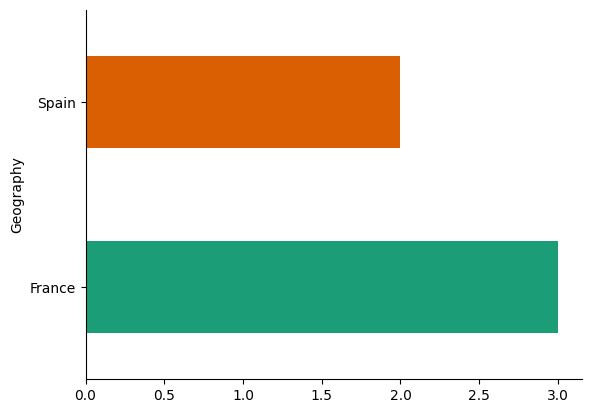

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Geography').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

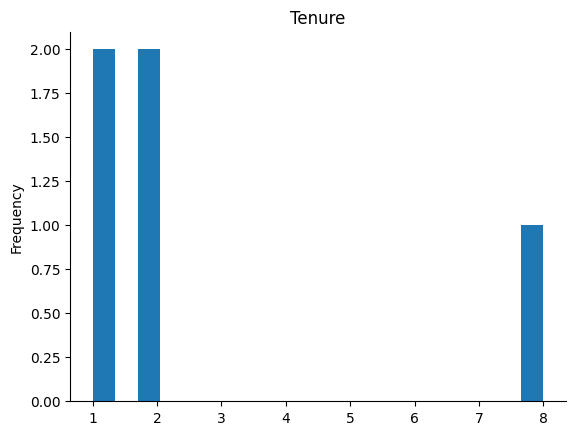

In [ ]:
from matplotlib import pyplot as plt
_df_3['Tenure'].plot(kind='hist', bins=20, title='Tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

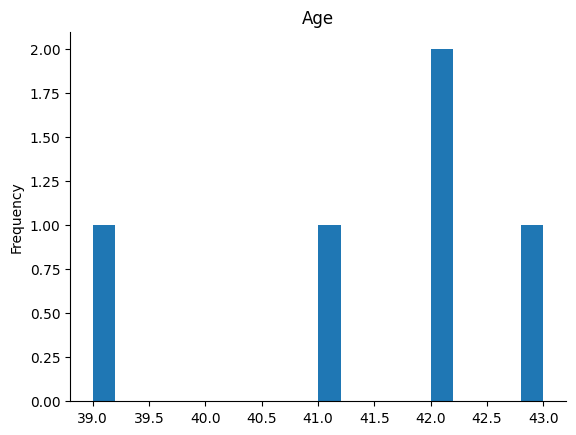

In [ ]:
from matplotlib import pyplot as plt
_df_2['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

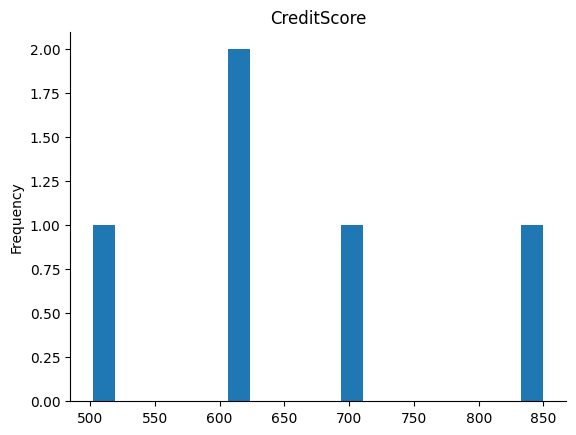

In [ ]:
from matplotlib import pyplot as plt
_df_1['CreditScore'].plot(kind='hist', bins=20, title='CreditScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

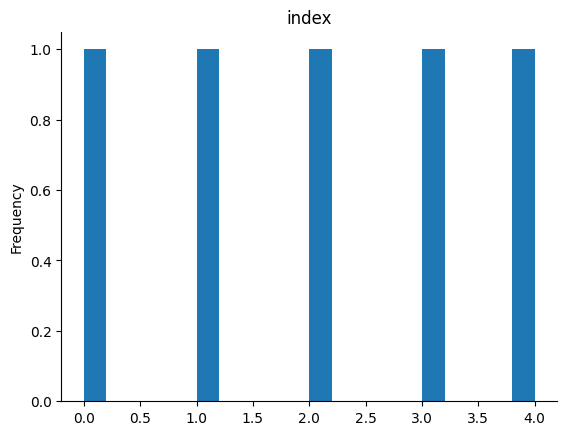

In [ ]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# ---------------------------------------------
# 🧠 BankGuard AI - Classification Model
# ---------------------------------------------

# ✅ 1. Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#2. โหลดข้อมูลที่ Clean แล้ว
df = pd.read_csv("/content/Customer-Churn-Records.csv")

#3. ตัดคอลัมน์ที่ไม่จำเป็น
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

#4. Encoding ข้อมูลเชิงข้อความ (Geography, Gender, Card Type)
df = pd.get_dummies(df, columns=['Geography', 'Gender', 'Card Type'], drop_first=True)

#5. แยก Features และ Target
X = df.drop('Exited', axis=1)
y = df['Exited']

#6. แบ่งข้อมูล Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#7. Scaling (ปรับขนาดข้อมูลเชิงตัวเลข)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#8. สร้างโมเดล (Random Forest)
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

#9. ทำนายผล
y_pred = model.predict(X_test_scaled)

#10. ประเมินผล
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

🎯 Accuracy: 0.9985

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


🧩 Confusion Matrix:
 [[1591    1]
 [   2  406]]


In [ ]:
#แยก X และ y
X = df.drop('Exited', axis=1)
y = df['Exited']

#แบ่ง Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
!pip install fastapi uvicorn scikit-learn pandas joblib


In [ ]:
%%writefile bankguard_api.py
# ---------------------------------------------
# 🏦 BankGuard AI - API for Customer Churn Prediction
# ---------------------------------------------
from fastapi import FastAPI
import joblib
import pandas as pd

# โหลดโมเดลและ scaler ที่เทรนไว้แล้ว
model = joblib.load("bankguard_model.pkl")
scaler = joblib.load("bankguard_scaler.pkl")

app = FastAPI(title="BankGuard AI API",
              description="Predict whether a bank customer will stay or leave",
              version="1.0")

@app.get("/")
def home():
    return {"message": "Welcome to BankGuard AI API 🚀"}

# Endpoint สำหรับพยากรณ์
@app.post("/predict")
def predict(data: dict):
    # แปลง dict → DataFrame
    df = pd.DataFrame([data])
    # Scaling (ใช้ scaler เดิม)
    df_scaled = scaler.transform(df)
    # ทำนาย
    prediction = model.predict(df_scaled)[0]
    result = "Leave ❌" if prediction == 1 else "Stay ✅"
    return {"prediction": int(prediction), "result": result}


Writing bankguard_api.py


In [ ]:
# โหลดข้อมูลใหม่ก่อน
import pandas as pd

df = pd.read_csv("/content/Customer-Churn-Records.csv")  # ใส่ path ให้ถูกกับไฟล์ของเฟิร์ส


In [ ]:
# ---------------------------------------------
# 🧠 BankGuard AI - Cox Proportional Hazards Model
# ---------------------------------------------

!pip install lifelines

import pandas as pd
from lifelines import CoxPHFitter

df = pd.read_csv("Customer-Churn-Records.csv")

cox_df = df[['CreditScore', 'Age', 'Tenure', 'Balance',
             'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
             'Exited', 'Geography', 'Gender']]

# แปลงข้อมูล categorical ให้เป็นตัวเลข
cox_df = pd.get_dummies(cox_df, columns=['Geography', 'Gender'], drop_first=True)

cox_df.rename(columns={'Tenure': 'duration', 'Exited': 'event'}, inplace=True)

#สร้าง Cox Model
cph = CoxPHFitter()
cph.fit(cox_df, duration_col='duration', event_col='event')

#แสดงผลสรุป
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 10000 total observations, 7962 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 10000
number of events observed = 2038
   partial log-likelihood = -16489.84
         time fit was run = 2025-10-16 17:36:45 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
CreditScore       -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
Age                0.05      1.05      0.00            0.04            0.05                1.05                1.05
Balance            0.00      1.00      0.00            0.00            0.00                1.00                1.00
NumOfProducts     -0.07      0.94      0.04           -0.14            0.01                0.87                1.01
IsActiveMember    -0.74      0.48      0.05           -0.83           -0.64                0.44                0.52
EstimatedSalary    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Geography_Germany  0.48      1.62      0.05            0.38            0.59                1.46                1.81
Geography_Spain    0.05      1.05      0.06           -0.07            0.17                0.93                1.18
Gender_Male       -0.39      0.68      0.04           -0.47           -0.30                0.62                0.74

                   cmp to      z      p  -log2(p)
covariate                                        
CreditScore          0.00  -2.18   0.03      5.10
Age                  0.00  26.77 <0.005    521.98
Balance              0.00   4.83 <0.005     19.50
NumOfProducts        0.00  -1.69   0.09      3.46
IsActiveMember       0.00 -15.54 <0.005    178.57
EstimatedSalary      0.00   0.00   1.00      0.00
Geography_Germany    0.00   8.92 <0.005     60.91
Geography_Spain      0.00   0.79   0.43      1.21
Gender_Male          0.00  -8.63 <0.005     57.21
---
Concordance = 0.72
Partial AIC = 32997.69
log-likelihood ratio test = 1154.82 on 9 df
-log2(p) of ll-ratio test = 804.45

✅ ขนาดข้อมูล: (10000, 18)
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIA

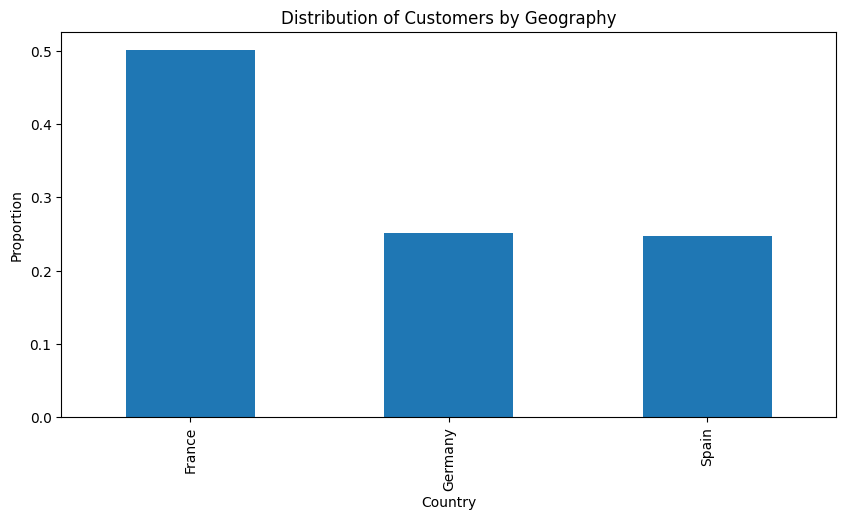

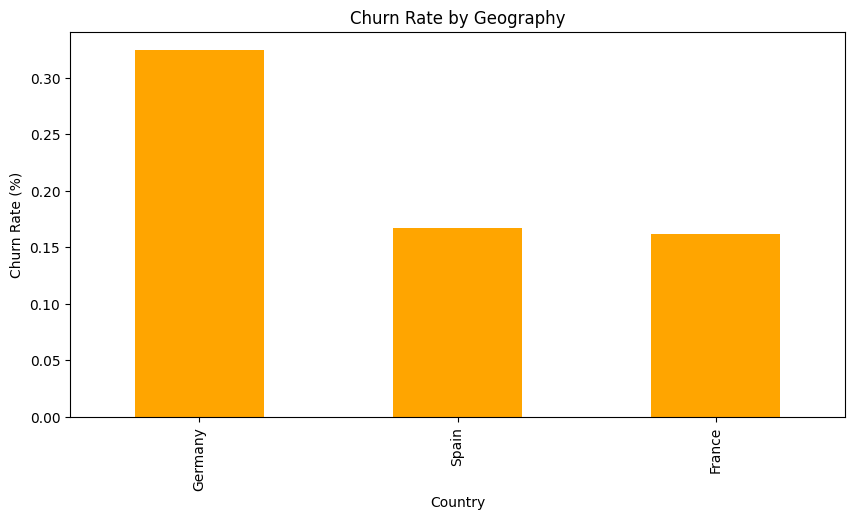

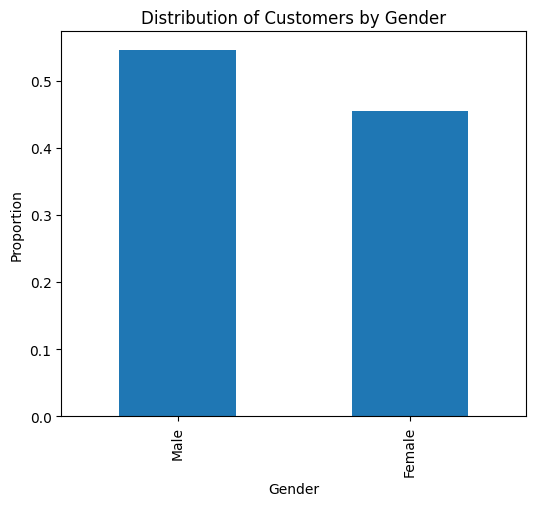

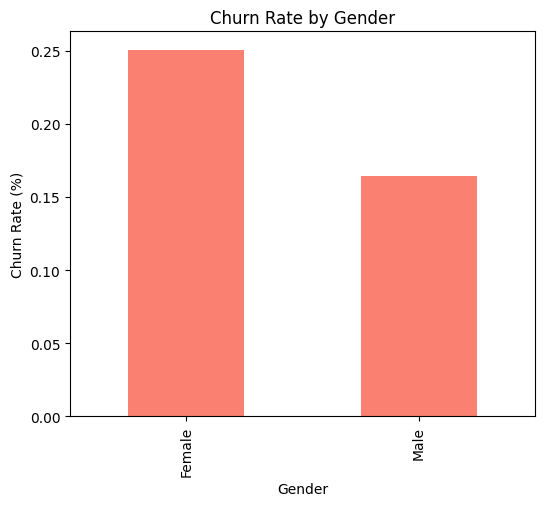

In [ ]:
# ---------------------------------------------
# 🧭 BankGuard AI - EDA: Customer Profile
# ---------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูล
df = pd.read_csv("Customer-Churn-Records.csv")

# ดูข้อมูลเบื้องต้น
print("✅ ขนาดข้อมูล:", df.shape)
print(df.head())

# ==============================================
# 📍 Distribution by Geography
# ==============================================
plt.figure(figsize=(10,5))
df['Geography'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Customers by Geography')
plt.xlabel('Country')
plt.ylabel('Proportion')
plt.show()

# 📉 Churn Rate by Geography
plt.figure(figsize=(10,5))
(df.groupby('Geography')['Exited']
   .mean()
   .sort_values(ascending=False)
   .plot(kind='bar', color='orange'))
plt.title('Churn Rate by Geography')
plt.xlabel('Country')
plt.ylabel('Churn Rate (%)')
plt.show()

# ==============================================
#Distribution by Gender
# ==============================================
plt.figure(figsize=(6,5))
df['Gender'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.show()

# 📉 Churn Rate by Gender
plt.figure(figsize=(6,5))
(df.groupby('Gender')['Exited']
   .mean()
   .sort_values(ascending=False)
   .plot(kind='bar', color='salmon'))
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Rate (%)')
plt.show()


In [ ]:
# ---------------------------------------------
# 🏦 BankGuard AI - Step 1: Import & Load Data
# ---------------------------------------------
import pandas as pd

df = pd.read_csv("Customer-Churn-Records.csv")

# ดูข้อมูลตัวอย่าง
print("✅ ขนาดข้อมูล:", df.shape)
df.head()


✅ ขนาดข้อมูล: (10000, 18)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
#ตรวจสอบค่าที่หายไป
print(df.isnull().sum())

#ลบคอลัมน์ที่ไม่จำเป็นต่อการทำนาย
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

#ตรวจสอบข้อมูลอีกครั้ง
df.info()


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   H

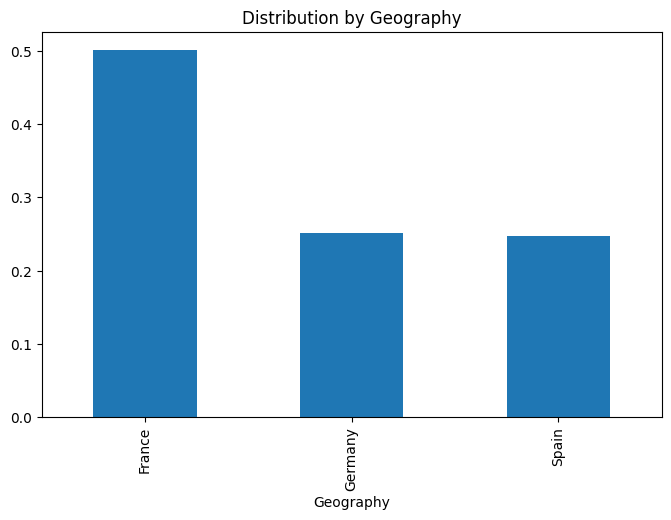

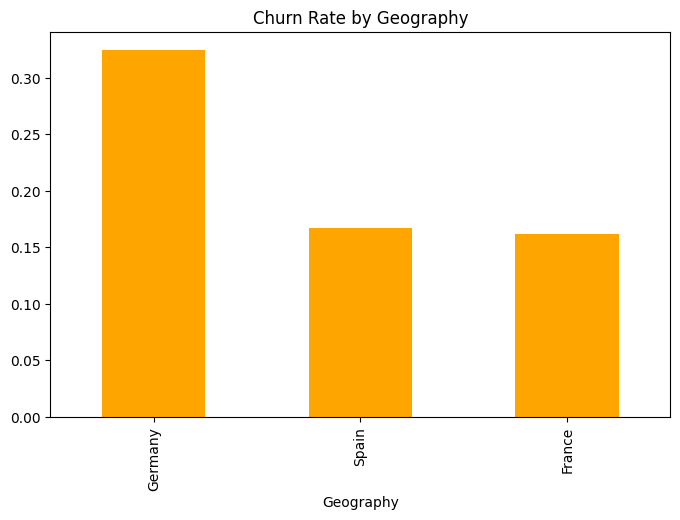

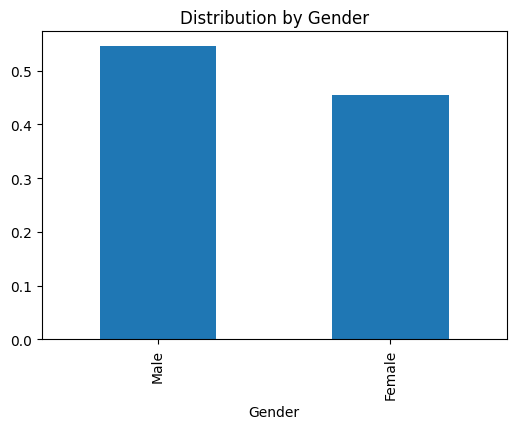

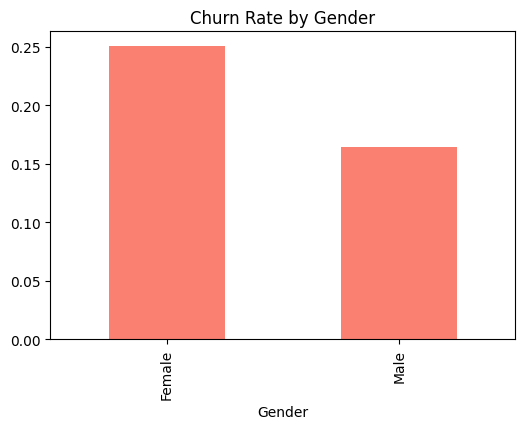

In [ ]:
import matplotlib.pyplot as plt

# Distribution by Geography
plt.figure(figsize=(8,5))
df['Geography'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution by Geography')
plt.show()

# Churn Rate by Geography
(df.groupby('Geography')['Exited'].mean().sort_values(ascending=False)
   .plot(kind='bar', color='orange', figsize=(8,5)))
plt.title('Churn Rate by Geography')
plt.show()

# Distribution by Gender
plt.figure(figsize=(6,4))
df['Gender'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution by Gender')
plt.show()

# Churn Rate by Gender
(df.groupby('Gender')['Exited'].mean().sort_values(ascending=False)
   .plot(kind='bar', color='salmon', figsize=(6,4)))
plt.title('Churn Rate by Gender')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# One-hot encoding (แปลง Geography, Gender)
df = pd.get_dummies(df, drop_first=True)

#แยก X, y
X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


🎯 Accuracy: 0.999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 8.7 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=8884ea96e5a85a0457ab2425517107cb642f93eb3a2061fe60f10856afc06d90
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


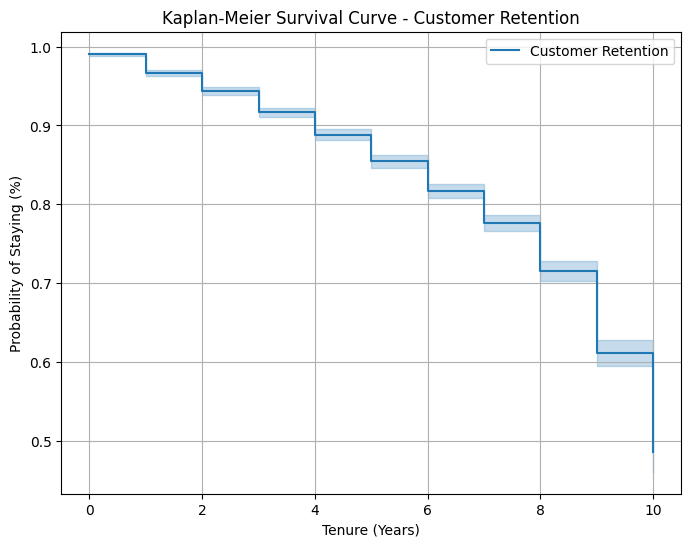

In [ ]:
# ---------------------------------------------
# 📉 BankGuard AI - Kaplan-Meier Survival Analysis
# ---------------------------------------------
!pip install lifelines

import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

df = pd.read_csv("Customer-Churn-Records.csv")

T = df["Tenure"]     # ระยะเวลาที่เป็นลูกค้า ปี
E = df["Exited"]     # 1 = ลาออก, 0 = ยังอยู่

# สร้าง Kaplan-Meier Model
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E, label="Customer Retention")

# วาดกราฟ Survival Curve
plt.figure(figsize=(8,6))
kmf.plot()
plt.title("Kaplan-Meier Survival Curve - Customer Retention")
plt.xlabel("Tenure (Years)")
plt.ylabel("Probability of Staying (%)")
plt.grid(True)
plt.show()


In [ ]:
from lifelines import CoxPHFitter

# เตรียมข้อมูลเพื่อCox Model
cox_df = df[['CreditScore', 'Age', 'Tenure', 'Balance',
             'NumOfProducts', 'IsActiveMember', 'EstimatedSalary',
             'Exited', 'Geography', 'Gender']]

#แปลง categorical ให้เป็นตัวเลข
cox_df = pd.get_dummies(cox_df, columns=['Geography', 'Gender'], drop_first=True)

#ตั้งชื่อคอลัมน์ให้ถูกต้อง
cox_df.rename(columns={'Tenure': 'duration', 'Exited': 'event'}, inplace=True)

#สร้างCox Model
cph = CoxPHFitter()
cph.fit(cox_df, duration_col='duration', event_col='event')

#แสดงผลสรุป
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 10000 total observations, 7962 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 10000
number of events observed = 2038
   partial log-likelihood = -16489.84
         time fit was run = 2025-10-17 16:52:33 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
CreditScore       -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
Age                0.05      1.05      0.00            0.04            0.05                1.05                1.05
Balance            0.00      1.00      0.00            0.00            0.00                1.00                1.00
NumOfProducts     -0.07      0.94      0.04           -0.14            0.01                0.87                1.01
IsActiveMember    -0.74      0.48      0.05           -0.83           -0.64                0.44                0.52
EstimatedSalary    0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Geography_Germany  0.48      1.62      0.05            0.38            0.59                1.46                1.81
Geography_Spain    0.05      1.05      0.06           -0.07            0.17                0.93                1.18
Gender_Male       -0.39      0.68      0.04           -0.47           -0.30                0.62                0.74

                   cmp to      z      p  -log2(p)
covariate                                        
CreditScore          0.00  -2.18   0.03      5.10
Age                  0.00  26.77 <0.005    521.98
Balance              0.00   4.83 <0.005     19.50
NumOfProducts        0.00  -1.69   0.09      3.46
IsActiveMember       0.00 -15.54 <0.005    178.57
EstimatedSalary      0.00   0.00   1.00      0.00
Geography_Germany    0.00   8.92 <0.005     60.91
Geography_Spain      0.00   0.79   0.43      1.21
Gender_Male          0.00  -8.63 <0.005     57.21
---
Concordance = 0.72
Partial AIC = 32997.69
log-likelihood ratio test = 1154.82 on 9 df
-log2(p) of ll-ratio test = 804.45

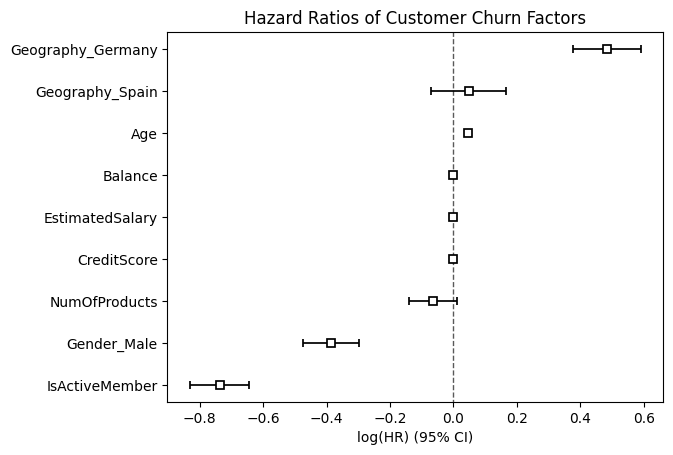

In [ ]:
#วาดกราฟ Hazard Ratio (Factor Importance)
cph.plot()
plt.title("Hazard Ratios of Customer Churn Factors")
plt.show()


In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Customer-Churn-Records.csv")

# Drop คอลัมน์ที่ไม่จำเป็น
df = df.drop(columns=['RowNumber','CustomerId','Surname'], errors='ignore')

# One-hot encode (Geography, Gender)
df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

# Features ที่เราจะใช้ (กำหนด order ให้แน่นอน)
expected_cols = [
    'CreditScore','Age','Tenure','Balance','NumOfProducts','IsActiveMember','EstimatedSalary',
    'Geography_Spain','Geography_Germany','Gender_Male'
]

# บาง dataset อาจไม่มีคอลัมน์ Geography_Spain/Germany ถ้าไม่มีให้เพิ่มค่า 0
for col in expected_cols:
    if col not in df.columns and col != 'CreditScore':
        df[col] = 0

#แยก X,y
X = df[expected_cols]
y = df['Exited']

#แบ่ง train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train_scaled, y_train)

joblib.dump(model, "bankguard_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Saved bankguard_model.pkl and scaler.pkl")


Saved bankguard_model.pkl and scaler.pkl


🎯 Accuracy: 99.9 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



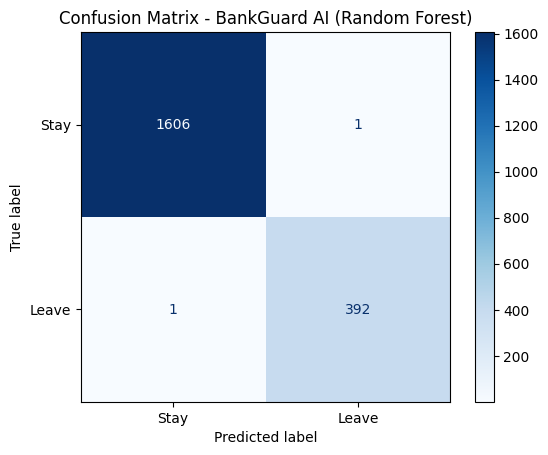

In [ ]:
# ---------------------------------------------
# 🤖 BankGuard AI - Model Building (Random Forest)
# ---------------------------------------------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# โหลดข้อมูล
df = pd.read_csv("/content/Customer-Churn-Records.csv")

# ลบคอลัมน์ที่ไม่จำเป็น
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

#One-hot encoding
df = pd.get_dummies(df, drop_first=True)

# แยก features และ target
X = df.drop('Exited', axis=1)
y = df['Exited']

#แบ่งข้อมูล train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#สร้าง Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=8)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# ประเมินผลลัพธ์
print("🎯 Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# แสดง Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Stay', 'Leave'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - BankGuard AI (Random Forest)")
plt.show()


✅ ข้อมูลตัวอย่าง 5 แถวแรก:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425



📏 จำนวนข้อมูลทั้งหมด: 10000 แถว และ 18 คอลัมน์

🧩 ประเภทของข้อมูลแต่ละคอลัมน์:
RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

🔍 ตรวจสอบค่าว่าง (Missing Values):
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited            

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000



📈 ค่ามัธยฐาน (Median):
RowNumber             5.000500e+03
CustomerId            1.569074e+07
CreditScore           6.520000e+02
Age                   3.700000e+01
Tenure                5.000000e+00
Balance               9.719854e+04
NumOfProducts         1.000000e+00
HasCrCard             1.000000e+00
IsActiveMember        1.000000e+00
EstimatedSalary       1.001939e+05
Exited                0.000000e+00
Complain              0.000000e+00
Satisfaction Score    3.000000e+00
Point Earned          6.050000e+02
dtype: float64


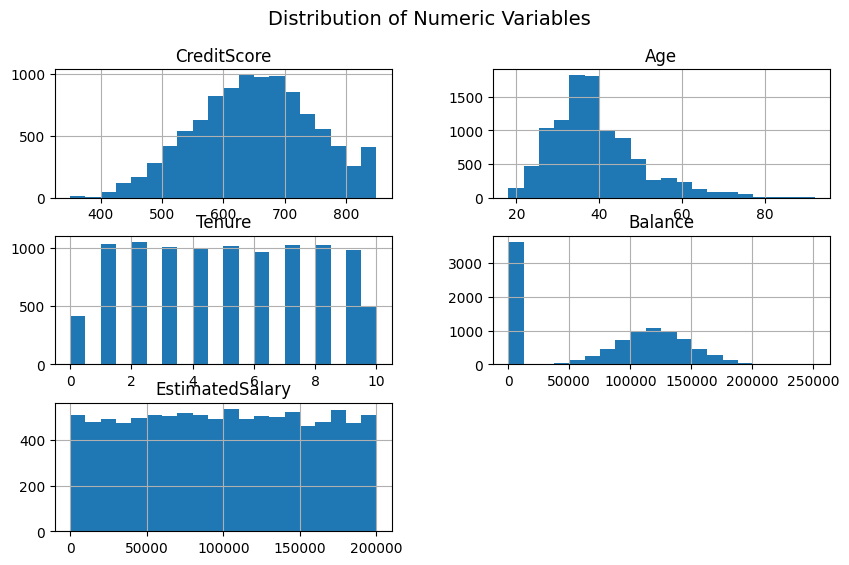

In [ ]:
# ---------------------------------------------
# BankGuard AI - Statistical Summary (EDA)
# ---------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

# โหลดข้อมูล
df = pd.read_csv("/content/Customer-Churn-Records.csv")

# ดูข้อมูลเบื้องต้น
print("✅ ข้อมูลตัวอย่าง 5 แถวแรก:")
display(df.head())

# ขนาดของข้อมูล
print("\n📏 จำนวนข้อมูลทั้งหมด:", df.shape[0], "แถว และ", df.shape[1], "คอลัมน์")

# ตรวจสอบประเภทของคอลัมน์
print("\n🧩 ประเภทของข้อมูลแต่ละคอลัมน์:")
print(df.dtypes)

# ตรวจสอบค่าว่าง
print("\n🔍 ตรวจสอบค่าว่าง (Missing Values):")
print(df.isnull().sum())

# แสดงสถิติเบื้องต้นของข้อมูลเชิงตัวเลข
print("\n📊 สรุปสถิติเบื้องต้น (Statistical Summary):")
display(df.describe())

# สรุปค่ามัธยฐาน (Median) เพิ่มเติม
print("\n📈 ค่ามัธยฐาน (Median):")
print(df.median(numeric_only=True))

# Distribution ของตัวแปรสำคัญ
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df[num_cols].hist(figsize=(10,6), bins=20)
plt.suptitle("Distribution of Numeric Variables", fontsize=14)
plt.show()


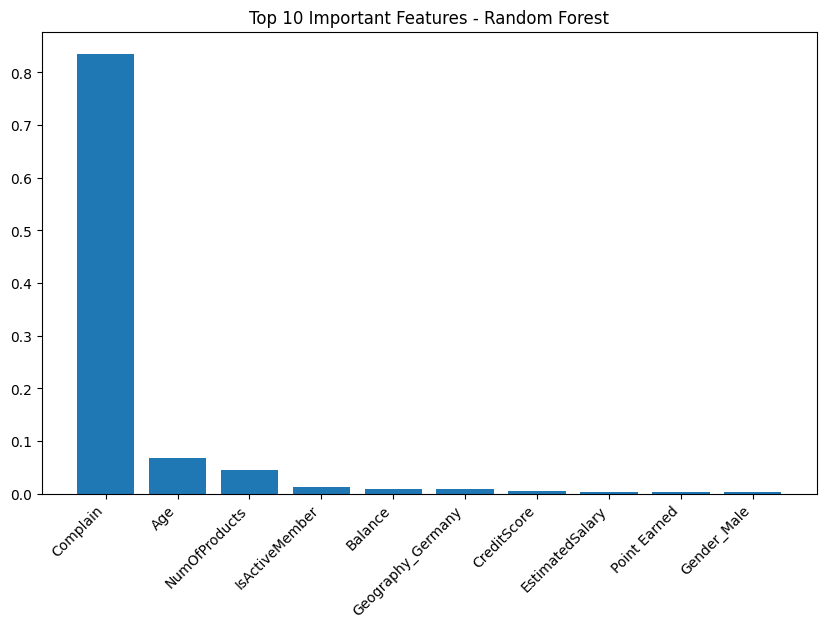

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
features = X.columns

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))

num_features_to_plot = min(10, len(features))
plt.bar(range(num_features_to_plot), importances[indices][:num_features_to_plot])
plt.xticks(range(num_features_to_plot), features[indices][:num_features_to_plot], rotation=45, ha='right')
plt.title("Top {} Important Features - Random Forest".format(num_features_to_plot))
plt.show()

In [ ]:
!git init
!git config --global user.email "firstend1998@gmail.com"
!git config --global user.name "Skibidi Boy"
!git remote add origin https://github.com/YourUsername/BankGuard-AI.git
!git add .
!git commit -m "Initial commit - BankGuard AI project"
!git branch -M main
!git push -u origin main


Reinitialized existing Git repository in /content/.git/
error: remote origin already exists.
On branch main
nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address
